In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


In [ ]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.8.0
TensorFlow 2.0 Hello World


In [ ]:
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

In [ ]:
from tensorflow import keras
from keras import models
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
import seaborn as sns

In [ ]:
def evaluate_preds(true_values, pred_values, save=False, vis=True):
    """Оценка качества модели и график preds vs true"""
    if vis:
        print("R2:\t" + str(np.round(r2(true_values, pred_values), 5)) + "\n" +
              "RMSE:\t" + str(np.round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
              "MSE:\t" + str(np.round(mse(true_values, pred_values), 3)))
        
        plt.figure(figsize=(8,8))
        
        sns.scatterplot(x=pred_values, y=true_values)
        plt.plot([0, np.max(pred_values)], [0, np.max(true_values)], linestyle='--', color='black')  # диагональ, где true_values = pred_values
        
        plt.xlabel('Predicted values')
        plt.ylabel('True values')
        plt.title('True vs Predicted values')
        
        if save == True:
            plt.savefig(REPORTS_FILE_PATH + 'report.png')
        plt.show()

    return np.round(r2(true_values, pred_values), 5), np.round(np.sqrt(mse(true_values, pred_values)), 3), np.round(mse(true_values, pred_values), 3)

In [ ]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#X_train.reshape(13,339)
X_train.shape

(339, 13)

In [ ]:
y_test.shape

(167,)

In [ ]:
model_test = models.Sequential()
model_test.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_test.add(layers.Dense(64, activation='relu'))
model_test.add(layers.Dense(1))

In [ ]:
model_test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_test.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])

hist1=model_test.fit(X_train, y_train, epochs=5)

Epoch 1/5
11/11 [==============================] - 1s 4ms/step - loss: 1780.3811 - mean_absolute_error: 34.7369
Epoch 2/5
11/11 [==============================] - 0s 7ms/step - loss: 357.1396 - mean_absolute_error: 15.0434
Epoch 3/5
11/11 [==============================] - 0s 4ms/step - loss: 183.5046 - mean_absolute_error: 10.5662
Epoch 4/5
11/11 [==============================] - 0s 3ms/step - loss: 110.3174 - mean_absolute_error: 8.7205
Epoch 5/5
11/11 [==============================] - 0s 7ms/step - loss: 84.4926 - mean_absolute_error: 6.2123


In [ ]:
y_pred_test = model_test.predict(X_test)
y_pred_test.shape

(167, 1)

In [ ]:
y_test.shape

(167,)

R2:	0.29657
RMSE:	7.296
MSE:	53.234


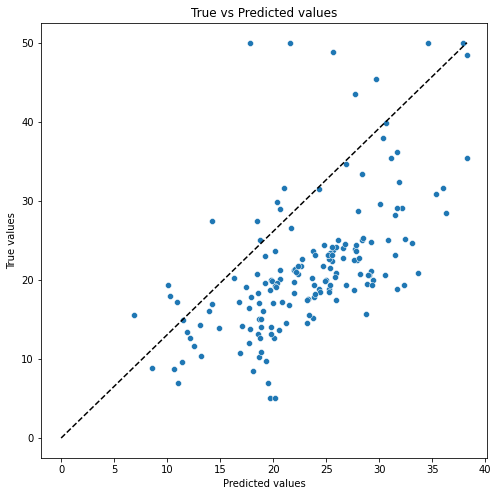

(0.29657, 7.296, 53.234)

In [ ]:
evaluate_preds(y_test, y_pred_test.copy().flatten() )

In [ ]:
model_1 = models.Sequential()
model_1.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(1))

model_2 = models.Sequential()
model_2.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_2.add(layers.Dense(1))

model_3 = models.Sequential()
model_3.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(1))

model_4 = models.Sequential()
model_4.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(1))

In [ ]:
l = [2, 1, 5, 10]
i = 0

res_list = []

for model in [model_1, model_2, model_3, model_4]:

  res = {}

  model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
  
  model.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model.predict(X_test)

  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)


  res['l'] = l[i]
  i += 1
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

  res_list.append(res)

In [ ]:
from pprint import pprint

In [ ]:
pprint(res_list)

[{'l': 2, 'mse': 51.8682, 'r2': 0.31462, 'rmse': 7.20196},
 {'l': 1, 'mse': 727.0419, 'r2': -8.60698, 'rmse': 26.96371},
 {'l': 5, 'mse': 47.68035, 'r2': 0.36996, 'rmse': 6.9051},
 {'l': 10, 'mse': 50.35832, 'r2': 0.33458, 'rmse': 7.09636}]


5 слоев оптимальнее, чем 1 или 2, 10 

In [ ]:
res_list = []

for n in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:

  res = {}

  model_n = models.Sequential()
  model_n.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
  model_n.add(layers.Dense(n, activation='relu'))
  model_n.add(layers.Dense(1))

  model_n.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
  
  model_n.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model_n.predict(X_test)

  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)


  res['n'] = n
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

  res_list.append(res)

In [ ]:
pprint(res_list)

[{'mse': 541.7582, 'n': 1, 'r2': -6.15868, 'rmse': 23.2757},
 {'mse': 1400.10096, 'n': 2, 'r2': -17.50064, 'rmse': 37.41792},
 {'mse': 75447.84192, 'n': 4, 'r2': -995.95202, 'rmse': 274.67771},
 {'mse': 7766.94836, 'n': 8, 'r2': -101.63083, 'rmse': 88.13029},
 {'mse': 144.00706, 'n': 16, 'r2': -0.90288, 'rmse': 12.00029},
 {'mse': 286.31334, 'n': 32, 'r2': -2.78328, 'rmse': 16.9208},
 {'mse': 59.67173, 'n': 64, 'r2': 0.21151, 'rmse': 7.72475},
 {'mse': 53.07731, 'n': 128, 'r2': 0.29865, 'rmse': 7.28542},
 {'mse': 45.24907, 'n': 256, 'r2': 0.40209, 'rmse': 6.72674},
 {'mse': 88.76186, 'n': 512, 'r2': -0.17288, 'rmse': 9.42135},
 {'mse': 68.1967, 'n': 1024, 'r2': 0.09886, 'rmse': 8.25813},
 {'mse': 63.02603, 'n': 2048, 'r2': 0.16719, 'rmse': 7.93889}]


In [ ]:
res_list = []

for opt in ['adam', 'RMSprop', 'Ftrl', 'Nadam', 'Adamax']:

  res = {}

  model_o = models.Sequential()
  model_o.add(layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
  model_o.add(layers.Dense(1024, activation='relu'))
  model_o.add(layers.Dense(1))

  model_o.compile(optimizer=opt,
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
  
  model_o.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model_o.predict(X_test)

  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)
  #print(y_pred_test)

  res['o'] = opt
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

  res_list.append(res)

In [ ]:
pprint(res_list)

[{'mse': 57.56685, 'o': 'adam', 'r2': 0.23932, 'rmse': 7.58728},
 {'mse': 397.93321, 'o': 'RMSprop', 'r2': -4.25821, 'rmse': 19.94826},
 {'mse': 54.67067, 'o': 'Ftrl', 'r2': 0.27759, 'rmse': 7.39396},
 {'mse': 49.16056, 'o': 'Nadam', 'r2': 0.3504, 'rmse': 7.01146},
 {'mse': 56.79393, 'o': 'Adamax', 'r2': 0.24954, 'rmse': 7.53617}]


Nadam лучше

In [ ]:
res_list = []

for opt in ['adam', 'RMSprop', 'Ftrl', 'Nadam', 'Adamax']:
  for n in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:
    for metrics in ['mean_absolute_error', 'mean_squared_error']:
      for loss in [tf.keras.losses.MeanSquaredError(), tf.keras.losses.MeanAbsoluteError()]:
        model_1 = models.Sequential()
        model_1.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_1.add(layers.Dense(n, activation='relu'))
        model_1.add(layers.Dense(1))

        model_2 = models.Sequential()
        model_2.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_2.add(layers.Dense(1))

        model_3 = models.Sequential()
        model_3.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(1))

        model_4 = models.Sequential()
        model_4.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(1))

        l = [2, 1, 5, 10]
        i = 0

        for model in [model_1, model_2, model_3, model_4]:

          res = {}

          model.compile(optimizer='adam',
                      loss=loss,
                      metrics=metrics)
          
          model.fit(X_train, y_train, epochs=5,
                      verbose = False)
          y_pred_test = model.predict(X_test)

          #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)


          res['l'] = l[i]
          res['n'] = n
          res['opt'] = opt
          res['metrics'] = metrics
          res['loss'] = loss
          i += 1
          res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
          res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
          res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

          print(res)

          res_list.append(res)

{'l': 2, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <keras.losses.MeanSquaredError object at 0x7fb42d90c110>, 'r2': -696.8906, 'rmse': 229.81584, 'mse': 52815.31948}
{'l': 1, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <keras.losses.MeanSquaredError object at 0x7fb42d90c110>, 'r2': -6.15856, 'rmse': 23.27551, 'mse': 541.7495}
{'l': 5, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <keras.losses.MeanSquaredError object at 0x7fb42d90c110>, 'r2': -6.15881, 'rmse': 23.27591, 'mse': 541.76804}
{'l': 10, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <keras.losses.MeanSquaredError object at 0x7fb42d90c110>, 'r2': -6.15878, 'rmse': 23.27586, 'mse': 541.7656}
{'l': 2, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <keras.losses.MeanAbsoluteError object at 0x7fb42d90c150>, 'r2': -0.31613, 'rmse': 9.98013, 'mse': 99.60297}
{'l': 1, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <ker

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(res_list)

In [ ]:
df.sort_values(by='r2', ascending=False).head(10)

,l,n,opt,metrics,loss,r2,rmse,mse
353,1,1024,RMSprop,mean_absolute_error,<keras.losses.MeanSquaredError object at 0x7fb...,0.50472,6.12229,37.48242
169,1,1024,adam,mean_squared_error,<keras.losses.MeanSquaredError object at 0x7fb...,0.50362,6.12905,37.56529
901,1,256,Adamax,mean_absolute_error,<keras.losses.MeanAbsoluteError object at 0x7f...,0.49563,6.17817,38.16973
929,1,1024,Adamax,mean_absolute_error,<keras.losses.MeanSquaredError object at 0x7fb...,0.49249,6.19736,38.40733
325,1,256,RMSprop,mean_absolute_error,<keras.losses.MeanAbsoluteError object at 0x7f...,0.48036,6.27103,39.32576
357,1,1024,RMSprop,mean_absolute_error,<keras.losses.MeanAbsoluteError object at 0x7f...,0.47873,6.28085,39.44912
905,1,256,Adamax,mean_squared_error,<keras.losses.MeanSquaredError object at 0x7fb...,0.47248,6.31838,39.92195
761,1,2048,Nadam,mean_squared_error,<keras.losses.MeanSquaredError object at 0x7fb...,0.47193,6.32165,39.96331
869,1,64,Adamax,mean_absolute_error,<keras.losses.MeanAbsoluteError object at 0x7f...,0.47184,6.32221,39.97029
737,1,1024,Nadam,mean_absolute_error,<keras.losses.MeanSquaredError object at 0x7fb...,0.46415,6.36808,40.55247


при разных настройках есть разные успешные комибнации.